# Project Name: Image Compression Using PCA: Dimensionality Reduction of MNIST Images

**Overview:**
This project introduces students to image compression techniques using Principal Component Analysis (PCA). Students will apply PCA to the MNIST dataset, compressing images by reducing dimensionality while preserving important visual features, highlighting the practical utility of PCA in data compression.

**You have:**
* The MNIST dataset consisting of grayscale images of handwritten digits (28x28 pixels).
* Basic knowledge of Python, NumPy, matplotlib, and scikit-learn.

**We will:**
1. Preprocess MNIST images by reshaping and normalizing data for PCA application.
2. Apply PCA to compress images by selecting an optimal number of principal components that balance dimensionality reduction and visual fidelity.
3. Reconstruct images from the compressed representations, evaluate reconstruction quality visually, and analyze variance preservation.

**Goal:**
Students will gain practical experience in image compression using PCA, understanding the trade-offs between compression efficiency and image quality, and learning how PCA can effectively capture essential data characteristics for real-world image processing tasks.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings('ignore')

## Notebook Utility

In [22]:
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA2.png", "PCA3.png", "PCA4.webp", "PCA5.webp"]
image_size = [1000, 700, 700, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../input/images/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


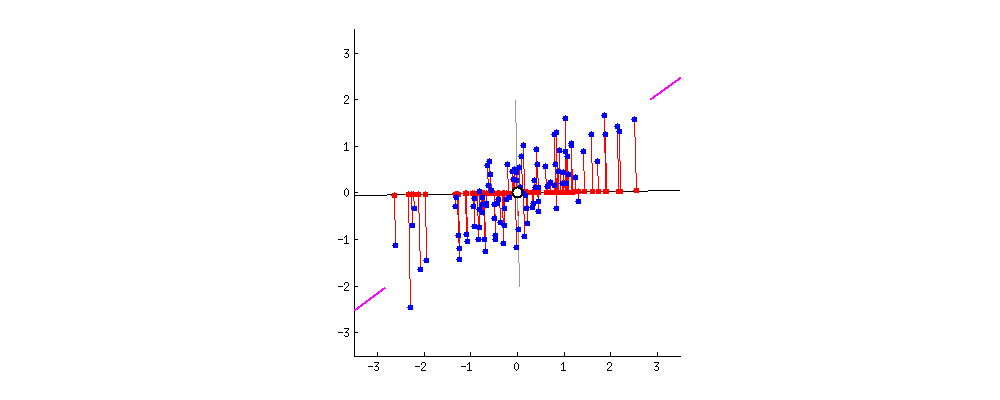

In [23]:
display(HTML(images_html[0]))


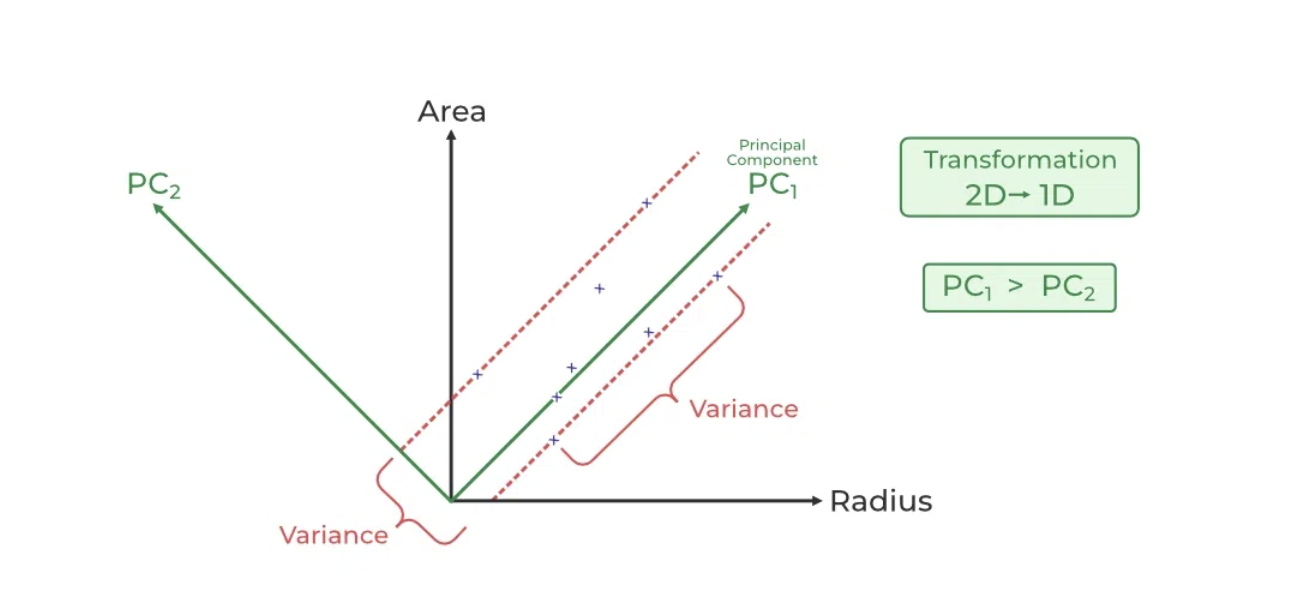

In [24]:
display(HTML(images_html[1]))


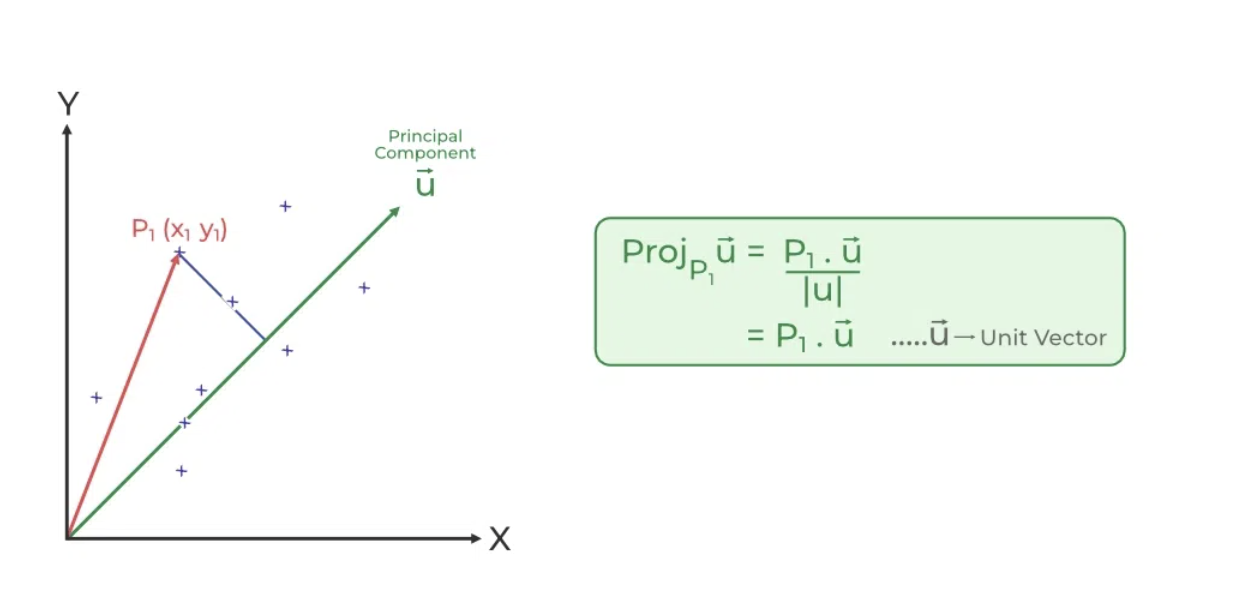

In [25]:
display(HTML(images_html[2]))


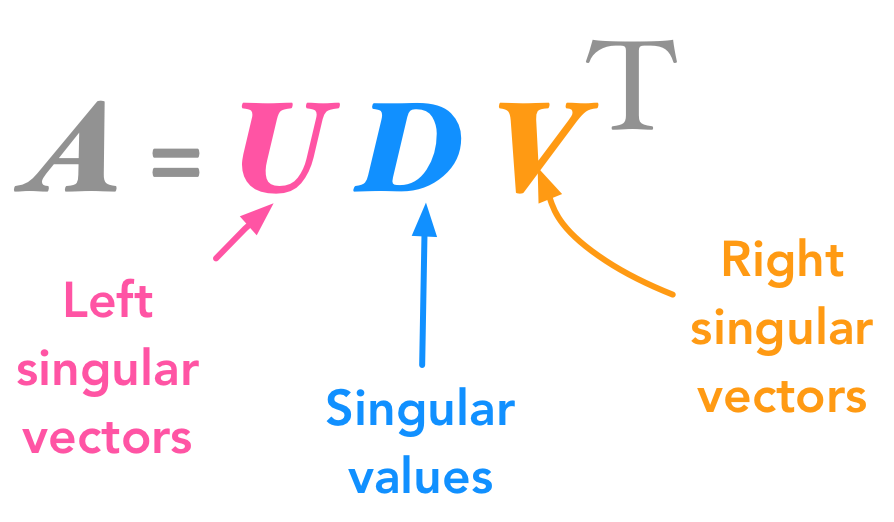

In [26]:
display(HTML(images_html[3]))


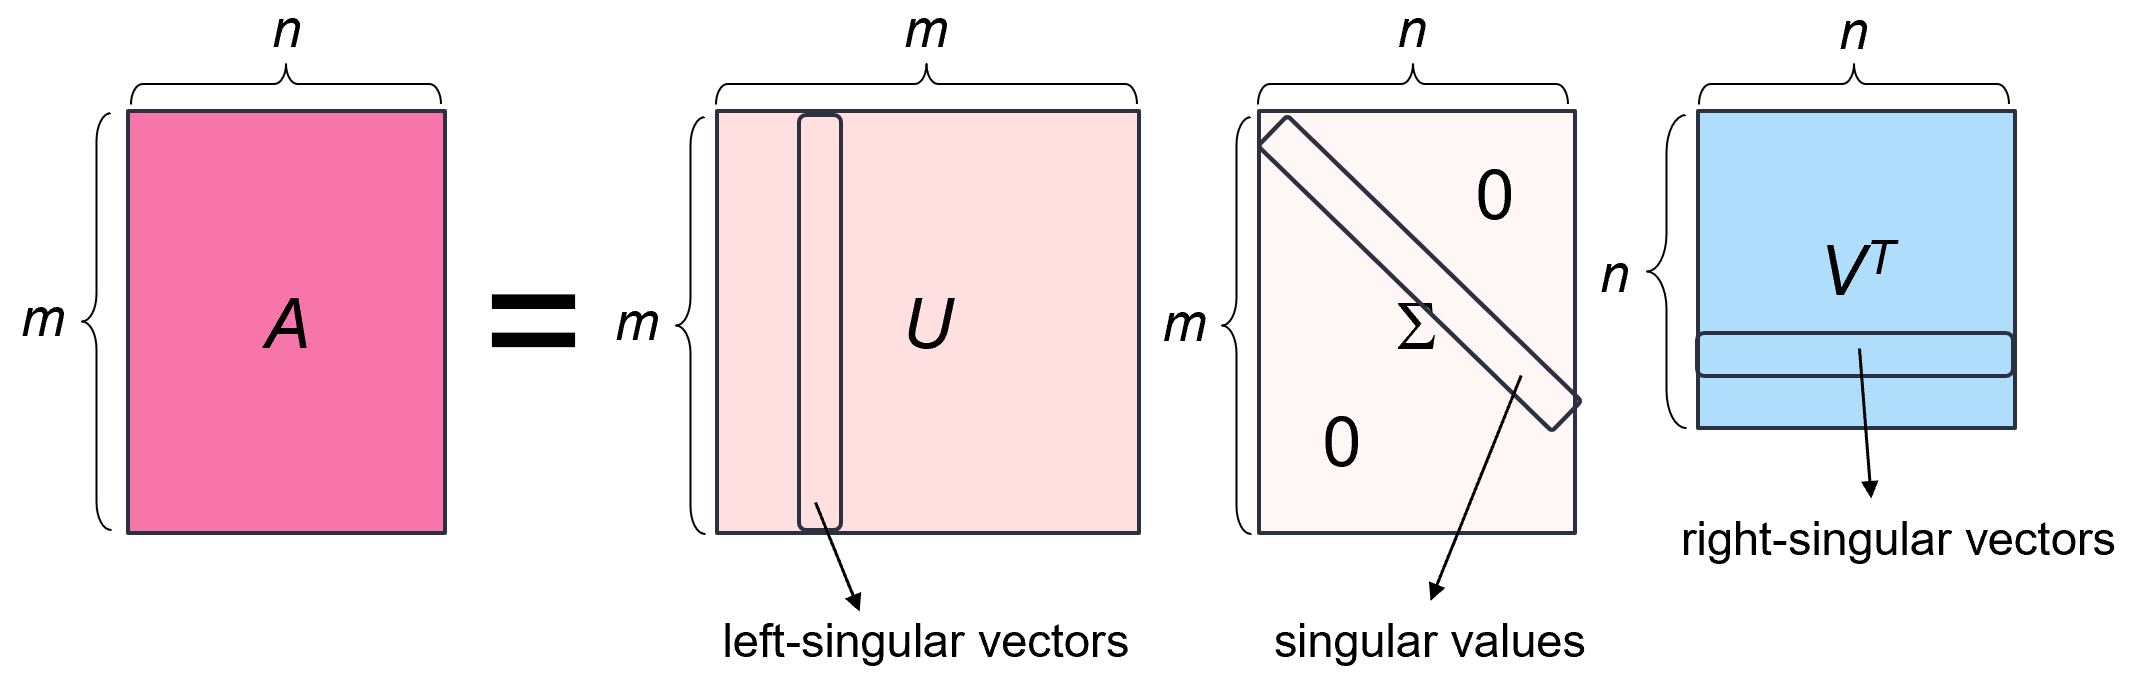

In [27]:
display(HTML(images_html[4]))


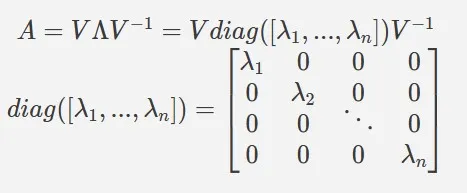

In [28]:
display(HTML(images_html[5]))

## Loading and inspecting dataset

In [3]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target


Loading MNIST dataset...


In [4]:
print(f"Dataset shape: {X.shape}")
print(f"Original image dimensions: 28x28 = {28*28} pixels")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (pixels): {X.shape[1]}")

Dataset shape: (70000, 784)
Original image dimensions: 28x28 = 784 pixels
Number of samples: 70000
Number of features (pixels): 784


## Normalizing data

In [14]:
n_samples = 1000
X_subset = X[:n_samples].astype('float64').to_numpy()
y_subset = y[:n_samples].to_numpy()

X_normalized = X_subset / 255.0

## Applying PCA compression

In [15]:
compression_levels = [10, 50, 100, 200]

print(f"Original dimensionality: {X_normalized.shape[1]} features")

pca_results = {}

for n_components in compression_levels:
    print(f"\n--- Compression Level: {n_components} components ---")
    
    pca = PCA(n_components=n_components, random_state=42)
    
    X_pca = pca.fit_transform(X_normalized)
    
    total_variance_preserved = np.sum(pca.explained_variance_ratio_)
    
    print(f"Dimensionality reduced from {X_normalized.shape[1]} to {n_components}")
    print(f"Variance preserved: {total_variance_preserved:.3f} ({total_variance_preserved*100:.1f}%)")
    print(f"Compression ratio: {X_normalized.shape[1]/n_components:.1f}:1")
    
    pca_results[n_components] = {
        'pca_model': pca,
        'transformed_data': X_pca,
        'variance_preserved': total_variance_preserved
    }

Original dimensionality: 784 features

--- Compression Level: 10 components ---
Dimensionality reduced from 784 to 10
Variance preserved: 0.509 (50.9%)
Compression ratio: 78.4:1

--- Compression Level: 50 components ---
Dimensionality reduced from 784 to 50
Variance preserved: 0.843 (84.3%)
Compression ratio: 15.7:1

--- Compression Level: 100 components ---
Dimensionality reduced from 784 to 100
Variance preserved: 0.929 (92.9%)
Compression ratio: 7.8:1

--- Compression Level: 200 components ---
Dimensionality reduced from 784 to 200
Variance preserved: 0.977 (97.7%)
Compression ratio: 3.9:1


In [16]:
sample_indices = [0, 1, 2, 3, 4]

reconstructed_images = {}

for n_components in compression_levels:
    pca_model = pca_results[n_components]['pca_model']
    X_pca = pca_results[n_components]['transformed_data']
    
    print(f"Reconstructing images using {n_components} components...")
    X_reconstructed = pca_model.inverse_transform(X_pca)
    
    X_reconstructed = np.clip(X_reconstructed, 0, 1)
    
    reconstructed_images[n_components] = X_reconstructed

print("Image reconstruction completed for all compression levels!")

Reconstructing images using 10 components...
Reconstructing images using 50 components...
Reconstructing images using 100 components...
Reconstructing images using 200 components...
Image reconstruction completed for all compression levels!


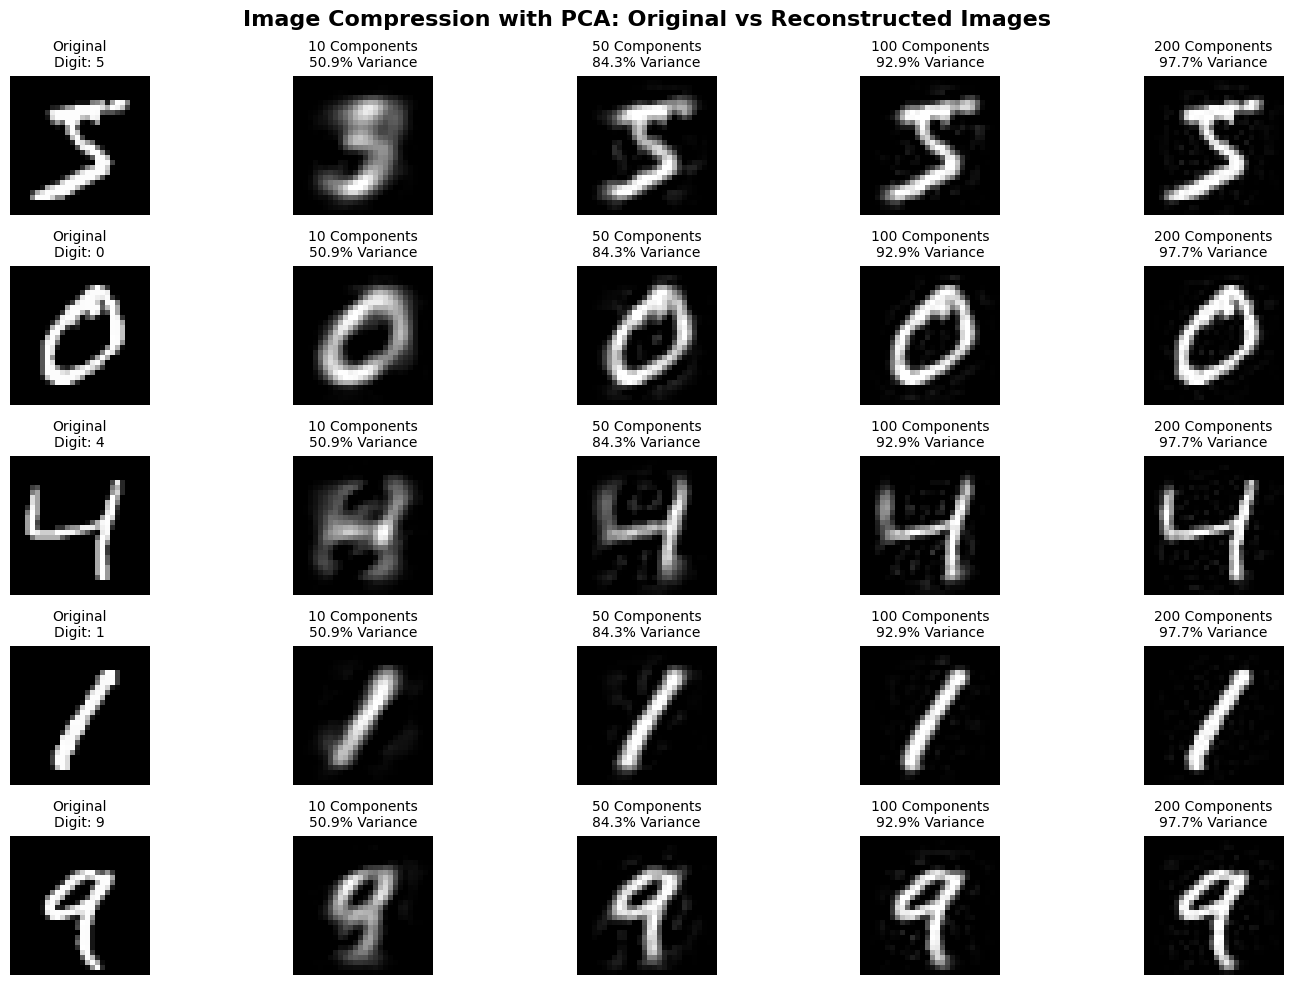

In [17]:
fig, axes = plt.subplots(len(sample_indices), len(compression_levels) + 1, 
                        figsize=(15, 10))
fig.suptitle('Image Compression with PCA: Original vs Reconstructed Images', 
             fontsize=16, fontweight='bold')

for i, img_idx in enumerate(sample_indices):
    original_img = X_normalized[img_idx].reshape(28, 28)
    axes[i, 0].imshow(original_img, cmap='gray')
    axes[i, 0].set_title(f'Original\nDigit: {y_subset[img_idx]}', fontsize=10)
    axes[i, 0].axis('off')
    
    for j, n_components in enumerate(compression_levels):
        reconstructed_img = reconstructed_images[n_components][img_idx].reshape(28, 28)
        variance_preserved = pca_results[n_components]['variance_preserved']
        
        axes[i, j+1].imshow(reconstructed_img, cmap='gray')
        axes[i, j+1].set_title(f'{n_components} Components\n{variance_preserved*100:.1f}% Variance', 
                              fontsize=10)
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

## Visualizing Eigenimages

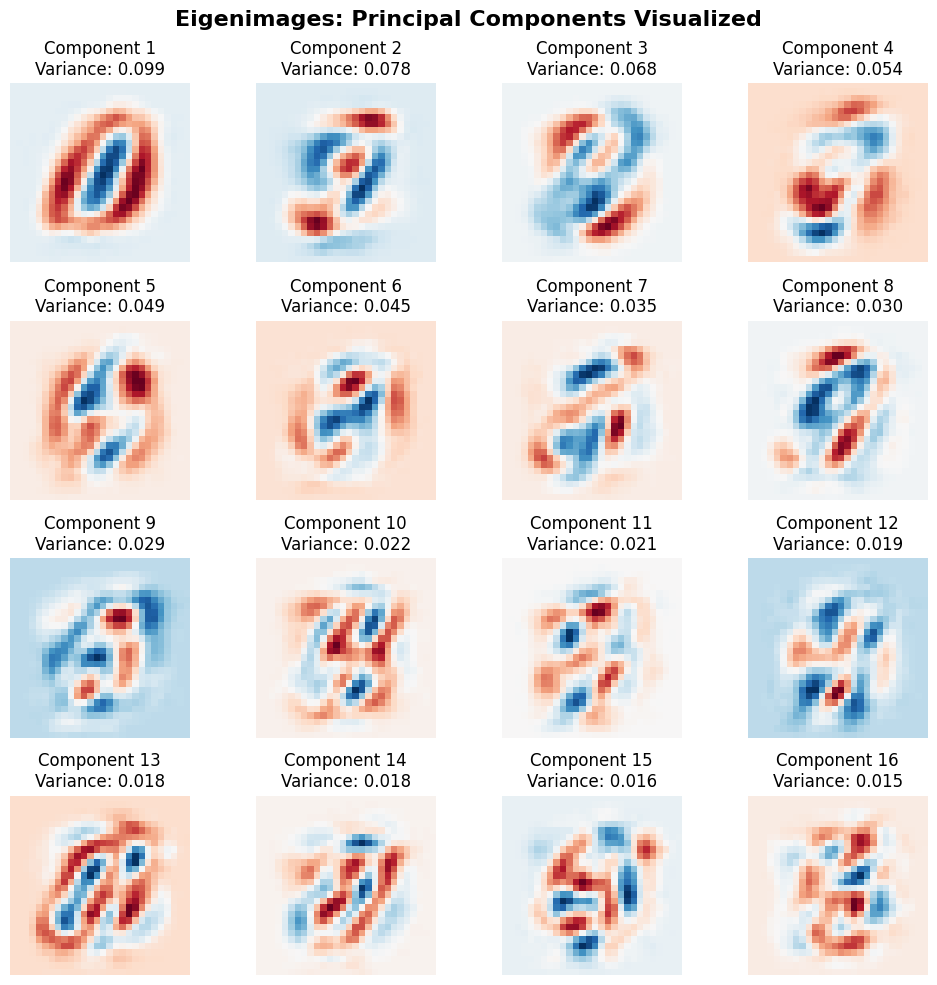

In [19]:
pca_model = pca_results[100]['pca_model']

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Eigenimages: Principal Components Visualized', fontsize=16, fontweight='bold')

for i in range(16):
    eigenimage = pca_model.components_[i].reshape(28, 28)
    
    axes[i//4, i%4].imshow(eigenimage, cmap='RdBu_r')
    axes[i//4, i%4].set_title(f'Component {i+1}\nVariance: {pca_model.explained_variance_ratio_[i]:.3f}')
    axes[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

## Reconstruction Error

Components:  10 | Variance Preserved:  50.9% | Compression: 78.4:1 | MSE: 0.031111
Components:  50 | Variance Preserved:  84.3% | Compression: 15.7:1 | MSE: 0.008897
Components: 100 | Variance Preserved:  92.9% | Compression:  7.8:1 | MSE: 0.003753
Components: 200 | Variance Preserved:  97.7% | Compression:  3.9:1 | MSE: 0.001125


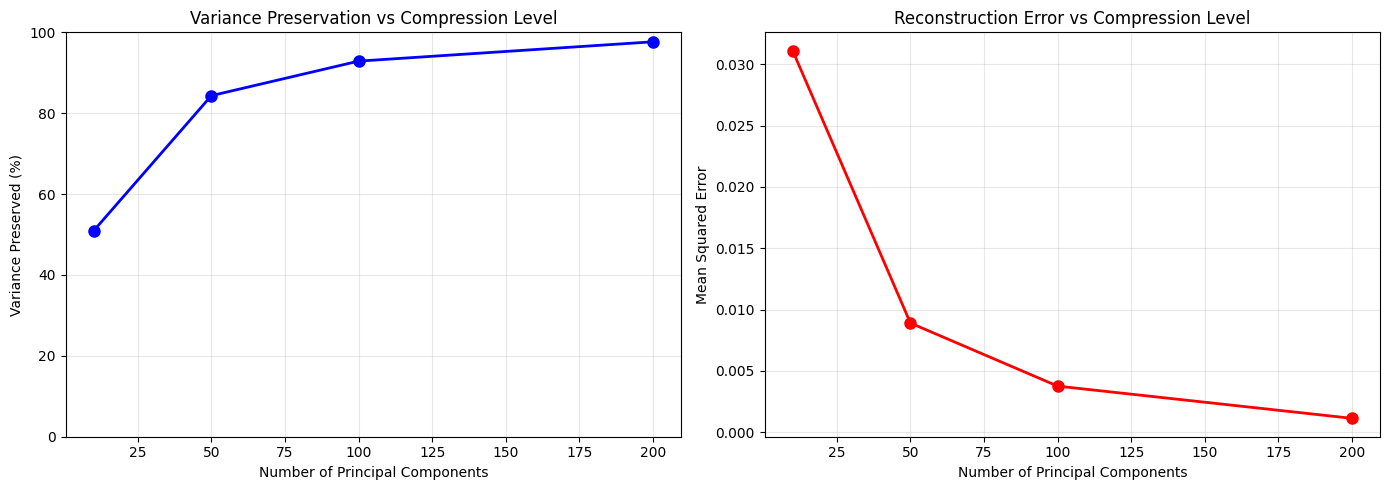

In [20]:
reconstruction_errors = []

for n_components in compression_levels:
    reconstructed = reconstructed_images[n_components]
    
    mse = np.mean((X_normalized - reconstructed) ** 2)
    reconstruction_errors.append(mse)
    
    variance_preserved = pca_results[n_components]['variance_preserved']
    compression_ratio = X_normalized.shape[1] / n_components
    
    print(f"Components: {n_components:3d} | "
          f"Variance Preserved: {variance_preserved*100:5.1f}% | "
          f"Compression: {compression_ratio:4.1f}:1 | "
          f"MSE: {mse:.6f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(compression_levels, [pca_results[n]['variance_preserved'] * 100 
                             for n in compression_levels], 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Variance Preserved (%)')
ax1.set_title('Variance Preservation vs Compression Level')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

ax2.plot(compression_levels, reconstruction_errors, 'r-o', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Reconstruction Error vs Compression Level')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## KEY CONCEPTS DEMONSTRATED:

1. DIMENSIONALITY REDUCTION:
* Original images: 784 dimensions (28×28 pixels)
* Compressed: 10-200 dimensions
* Compression ratios: 78:1 to 4:1

2. EIGENIMAGES (PRINCIPAL COMPONENTS):
* Fundamental patterns discovered by PCA
* Ordered by importance (explained variance)
* Can be visualized as ghostly digit patterns

4. VARIANCE PRESERVATION:
* Measures how much information is retained
* Higher components = better quality, less compression
* Trade-off between file size and image quality

5. RECONSTRUCTION PROCESS:
* Transform: Original → PCA space (compression)
* Inverse Transform: PCA space → Reconstructed image
* Quality depends on number of components kept

6. COMPRESSION TRADE-OFFS:
* Few components: High compression, lower quality
* Many components: Lower compression, higher quality
* Sweet spot depends on application requirements

7. PRACTICAL APPLICATIONS:
* Image compression for storage/transmission
* Noise reduction in images
* Feature extraction for machine learning
* Data visualization and analysis